### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in data from cleaned csv with labels and integer values

In [2]:
pvp_data = pd.read_csv('C:/Users/julienw/OneDrive - Michigan Medicine/Documents/PVP/Data/pvp_clean_w_labels.csv')

In [3]:
# Drop rows that didn't complete any of Case 1-6
pvp_data = pvp_data[pvp_data['case1_q3'].notna() | pvp_data['case2_q6'].notna() 
                   | pvp_data['case3_q8'].notna() | pvp_data['case4_q11'].notna() |
                   pvp_data['case5_q14'].notna() | pvp_data['case6_q17'].notna()]

### Make dataframe for Table 1 called "part_chars"

In [4]:
# Make new df for Table 1 and insert id column from original df
part_chars = pvp_data.loc[:, "role":"where"]
part_chars['id'] = pvp_data.id

# Move the column to head of list using index, pop and insert
cols = list(part_chars)
cols.insert(0, cols.pop(cols.index('id')))

# Use ix to reorder
part_chars = part_chars.loc[:, cols]

# Replace NaNs with 'missing'
part_chars = part_chars.fillna('missing')

In [5]:
# Total N
total = len(part_chars)
print(f'N = {total}')

N = 550


In [6]:
# Generate gender breakdown

# Count occurrence of each value in 'gender' column
counts = part_chars.gender.value_counts()

# Count occurrence of each value in 'gender' column as percentage of total 
percs = part_chars.gender.value_counts(normalize=True)*100

# Concatenate results into one DataFrame
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Male,261,47.454545
Female,192,34.909091
missing,83,15.090909
Prefer not to answer,13,2.363636
Non-binary,1,0.181818


In [7]:
# Generate Years in Practice Breakdown
counts = part_chars.experience.value_counts()
percs = part_chars.experience.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
15+,173,31.454545
1-5 years,114,20.727273
missing,85,15.454545
6-10 years,73,13.272727
11-15 years,54,9.818182
training,51,9.272727


In [8]:
# Generate Clinical Role Breakdown
counts = part_chars.role.value_counts()
percs = part_chars.role.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Physician,337,61.272727
APP,101,18.363636
missing,80,14.545455
Other,32,5.818182


In [9]:
# Generate Clinical Environment Breakdown
counts = part_chars.practype.value_counts()
percs = part_chars.practype.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Academic,294,53.454545
Other,91,16.545455
Private practice,83,15.090909
missing,82,14.909091


### Specialty Modification

In [10]:
# Old Specialty Breakdown
pd.concat([part_chars['specialty'].str.split(',').explode().value_counts(),
                 pd.Series([part_chars['specialty'].str.contains(',').sum()], index=[7])])

1          369
missing     81
3           73
2           63
5           60
6           49
4           35
7          160
dtype: int64

In [11]:
part_chars['spec_area'] = part_chars['specialty'].replace({
'1,2' : '2',
'1,3' : '3',
'1,4' : '4',
'1,5' : '5',
'1,6' : '6',
'2,6' : '2',
'3,6' : '3',
'1,2,3': '3',
'1,2,6' : '2',
'1,3,6' : '3',
'1,2,3' : '3',
'1,2,4' : '4',
'1,2,4,6' : '4',
'1,2,5' : '5'
})

In [12]:
# Generate Specialty Area Breakdown
counts = part_chars.spec_area.value_counts()
percs = part_chars.spec_area.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
1,211,38.363636
missing,81,14.727273
3,73,13.272727
5,60,10.909091
2,53,9.636364
6,37,6.727273
4,35,6.363636


In [13]:
# Generate cc_train variable
part_chars['cctrain'] = np.where(part_chars['specialty'] == 'missing', 'missing',
          np.where((part_chars['specialty'] == 1) | part_chars['specialty'].str.contains('1'), 1, 0))

In [14]:
# Generate Critical Care Training Breakdown
counts = part_chars.cctrain.value_counts()
percs = part_chars.cctrain.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
1,369,67.090909
0,100,18.181818
missing,81,14.727273


In [15]:
# Generate ICU Type Breakdown
counts = part_chars.icutype.value_counts()
percs = part_chars.icutype.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Mixed,221,40.181818
Medical,118,21.454545
Surgical,97,17.636364
missing,84,15.272727
Other,30,5.454545


In [16]:
# Generate ICU Beds Breakdown
counts = part_chars.beds.value_counts()
percs = part_chars.beds.value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
11-20,175,31.818182
21-30,144,26.181818
missing,81,14.727273
31-40,62,11.272727
41+,58,10.545455
0-10,30,5.454545


In [17]:
# Generate Region Breakdown
counts = part_chars['where'].value_counts()
percs = part_chars['where'].value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Northeast,141,25.636364
Midwest,121,22.000000
south,118,21.454545
west,88,16.000000
missing,80,14.545455
outside,2,0.363636


### Table 2

In [18]:
# Generate Practice Policy Breakdown

# Replace NaNs with 'missing'
pvp_data['infl_factors'] = pvp_data['infl_factors'].fillna('missing')

counts = pvp_data['infl_factors'].value_counts()
percs = pvp_data['infl_factors'].value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Personal practice,242,44.000000
Hospital Policy,136,24.727273
missing,74,13.454545
Other,64,11.636364
Nursing Preference,34,6.181818


### Table 3

In [19]:
# Generate Realism Breakdown

# Replace NaNs with 'missing'
pvp_data['realism'] = pvp_data['realism'].fillna('missing')

counts = pvp_data['realism'].value_counts()
percs = pvp_data['realism'].value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Very realistic,251,45.636364
Somewhat realistic,204,37.090909
missing,73,13.272727
Somewhat unrealistic,20,3.636364
Unrealistic,2,0.363636


### Plots for Figure 1

Question: The dataframe subsetted by gender input contains a few missing values for some fields. Is this okay?

### Usual Fluid

In [20]:
plt.rcParams.update({'font.size': 15})

In [21]:
print(f"N = {len(pvp_data['usual_fluid'].dropna())}")

N = 471


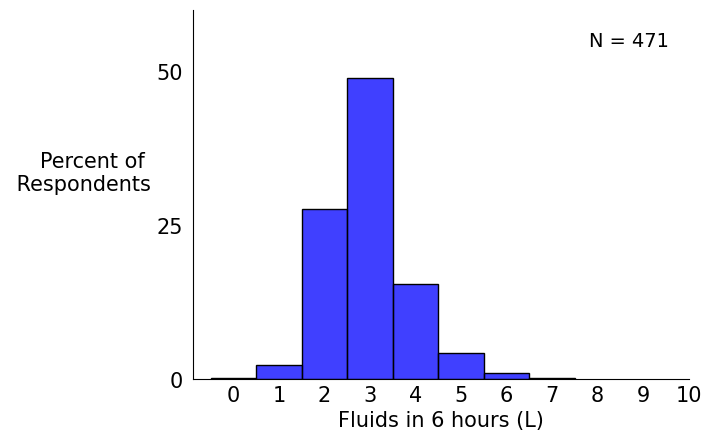

In [22]:
# Plotting Fluids in 6 hours 
ax = sns.histplot(
    data=pvp_data,
    x='usual_fluid',
    discrete=True,
    stat='percent',
    color = 'blue'
)
ax.set(xlabel='Fluids in 6 hours (L)', ylabel='Percent of \n Respondents', 
       ylim = [0,60])
ax.set_xticks(np.arange(0,11,1))
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right')
ax.tick_params(left = False, bottom = False)
ax.tick_params(axis='x', which='major', pad=1)
ax.spines[['right', 'top']].set_visible(False)
#ax.legend(f"N = {len(pvp_data['usual_fluid'])}")
ax.annotate("N = 471", xy=(0.8,0.9),xycoords='axes fraction',
             fontsize=14)
ax.yaxis.set_major_locator(plt.MultipleLocator(25))


### MAP Goal

In [23]:
print(f"N = {len(pvp_data['usual_map'].dropna())}")

N = 472


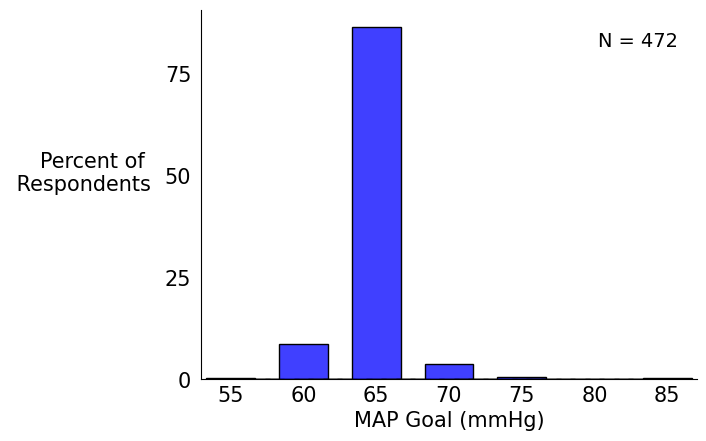

In [24]:
# Plotting MAP Goal
import pylab as plt
import seaborn as sns

tips = sns.load_dataset("tips")
fig, ax = plt.subplots()

ax = sns.histplot(
    data=pvp_data,
    x='usual_map',
    discrete=True,
    stat = 'percent',
    #shrink = 0.98,
    color = 'blue'
)
ax.set(xlabel='MAP Goal (mmHg)', ylabel='Percent of \n Respondents')
       #yscale = 'log')
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right', labelpad = 10)
ax.tick_params(left = False, bottom = False)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='x', which='major', pad=1)
ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.get_yaxis().set_tick_params(which='minor', width=0) 
ax.annotate("N = 472", xy=(0.8,0.9),xycoords='axes fraction',
             fontsize=14)
ax.yaxis.set_major_locator(plt.MultipleLocator(25))
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, 3.35)
plt.show()
#ax.bar(6,width = 5)

### Vasopressor Timing

In [25]:
print(f"N = {len(pvp_data['usual_vp'].dropna())}")

N = 474


C:\Users\julienw\AppData\Local\Temp\ipykernel_10956\3317979001.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Before Giving Fluid', 'While Giving Fluid', 'After Giving Fluid'], fontsize = 12)


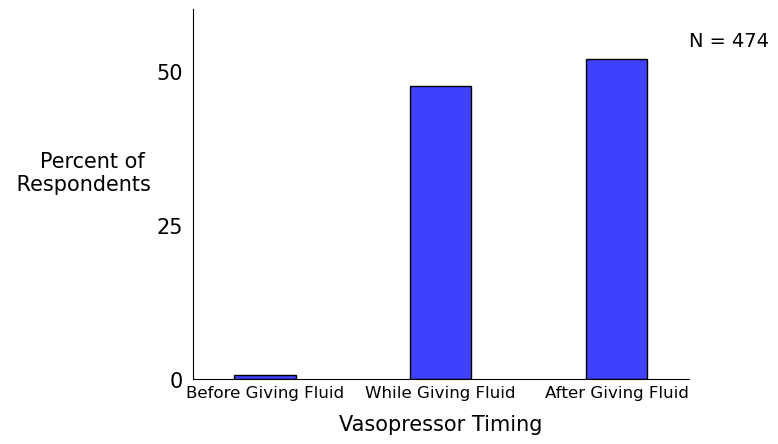

In [26]:
# Plotting Vasopressor Timing
pvp_data['usual_vp'] = pd.Categorical(pvp_data['usual_vp'],
                                   categories=['Before giving fluid', 'while giving fluid', 'After giving fluid'],
                                   ordered=True
                                  )
ax = sns.histplot(
    data=pvp_data,
    x='usual_vp',
    discrete=True,
    shrink = 0.35,
    stat='percent',
    color = 'blue',
)
ax.set(xlabel='Vasopressor Timing', ylabel='Percent of \n Respondents', 
       ylim = [0,60])
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right')
ax.set_xlabel(ax.get_xlabel(), labelpad = 10)
ax.set_xticklabels(['Before Giving Fluid', 'While Giving Fluid', 'After Giving Fluid'], fontsize = 12)
ax.tick_params(left = False, bottom = False)
ax.spines[['right', 'top']].set_visible(False)
ax.annotate("N = 474", xy=(1.0,0.9),xycoords='axes fraction',
             fontsize=14)
ax.yaxis.set_major_locator(plt.MultipleLocator(25))
ax.tick_params(axis='x', which='major', pad=1)
ax.margins(x=0.1)

In [27]:
print(f"N = {len(pvp_data['usual_cl'].dropna())}")

N = 470


C:\Users\julienw\AppData\Local\Temp\ipykernel_10956\198545841.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Never', 'Rarely', 'Sometimes', 'Often', 'Always'], fontsize = 12)


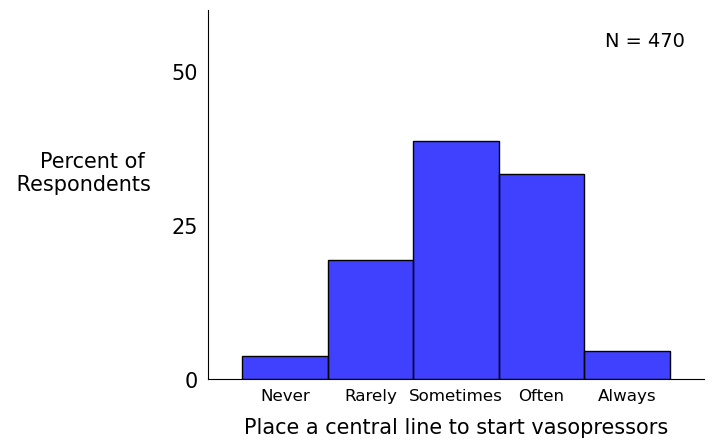

In [28]:
# Plotting Route of VP administration
pvp_data.usual_cl = pd.Categorical(pvp_data.usual_cl,
                                   categories=['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
                                   ordered=True
                                  )
ax = sns.histplot(
    data=pvp_data,
    x='usual_cl',
    discrete=True,
    #shrink = 0.85,
    stat='percent',
    color = 'blue',
)
ax.set(xlabel='Place a central line to start vasopressors', ylabel='Percent of \n Respondents', ylim = [0,60])
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right', labelpad = 15)
ax.set_xlabel(ax.get_xlabel(), labelpad = 10)
ax.set_xticklabels(['Never', 'Rarely', 'Sometimes', 'Often', 'Always'], fontsize = 12)
ax.tick_params(left = False, bottom = False)
ax.annotate("N = 470", xy=(0.8,0.9),xycoords='axes fraction',
             fontsize=14)
ax.yaxis.set_major_locator(plt.MultipleLocator(25))
ax.spines[['right', 'top']].set_visible(False)
ax.margins(x = 0.08)

### Figure 3

In [29]:
fig_3a = pvp_data[['route1_q3','route3_q8','route5_q14']].copy(deep = True)
fig_3a = pd.Series(fig_3a.stack().values)

In [30]:
len(fig_3a.dropna())

1127

C:\Users\julienw\AppData\Local\Temp\ipykernel_10956\3556967888.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['PIV Only', 'PIV Bridge', 'Central Only'], fontsize = 12)


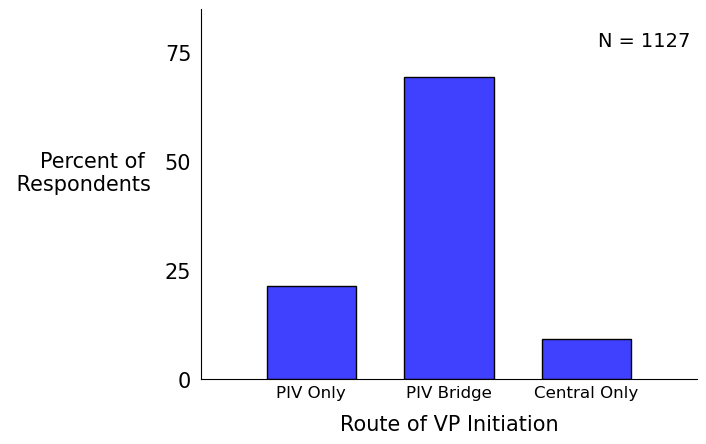

In [31]:
fig_3a = pd.Categorical(fig_3a,
                               categories=['PIV Only', 'PIV bridge', 'Central Only'],
                               ordered=True
                       )
fig_3a
ax = sns.histplot(
    data=fig_3a,
    stat = 'percent',
    shrink = 0.65,
    color = 'blue'
)
ax.set(xlabel='Route of VP Initiation', ylabel='Percent of \n Respondents', ylim = [0,85])
       #yscale = 'log')
    
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right', labelpad = 10)
ax.set_xlabel(ax.get_xlabel(), labelpad = 10)
ax.set_xticklabels(['PIV Only', 'PIV Bridge', 'Central Only'], fontsize = 12)
ax.tick_params(left = False, bottom = False)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='x', which='major', pad=1)
ax.annotate("N = 1127", xy=(0.8,0.9),xycoords='axes fraction',
             fontsize=14)
ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.yaxis.set_major_locator(plt.MultipleLocator(25))
ax.spines[['right', 'top']].set_visible(False)
ax.margins(x = 0.18)

In [32]:
fig_3b = pvp_data['route6_q17']
print(len(fig_3b.dropna()))

367


C:\Users\julienw\AppData\Local\Temp\ipykernel_10956\2522916227.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['PICC Only', 'PIV Only', 'PIV Bridge', 'Central Only'], fontsize = 12)


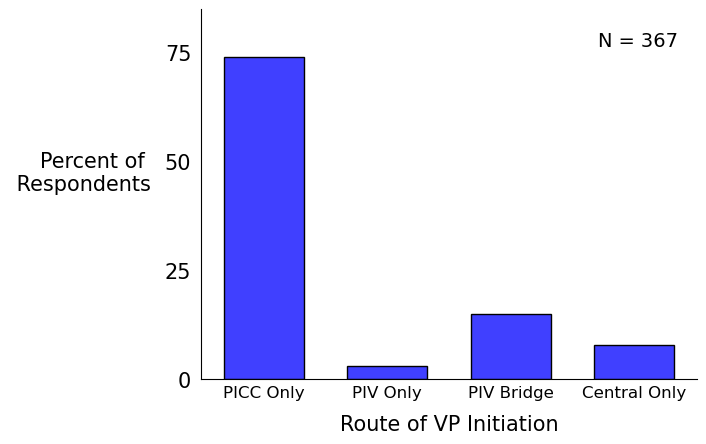

In [33]:
fig_3b = pd.Categorical(fig_3b,
                               categories=['PICC', 'PIV Only', 'PIV bridge', 'Central only'],
                               ordered=True
                       )
#fig_3a
ax = sns.histplot(
    data=fig_3b,
    stat = 'percent',
    shrink = 0.65,
    color = 'blue'
)
ax.set(xlabel='Route of VP Initiation', ylabel='Percent of \n Respondents', ylim = [0,85])
       #yscale = 'log')
    
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right', labelpad = 10)
ax.set_xlabel(ax.get_xlabel(), labelpad = 10)
ax.set_xticklabels(['PICC Only', 'PIV Only', 'PIV Bridge', 'Central Only'], fontsize = 12)
ax.tick_params(left = False, bottom = False)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='x', which='major', pad=1)
ax.annotate("N = 367", xy=(0.8,0.9),xycoords='axes fraction',
             fontsize=14)
ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.yaxis.set_major_locator(plt.MultipleLocator(25))
ax.spines[['right', 'top']].set_visible(False)
#ax.margins(x = 0.18)

In [34]:
fig_3c = pvp_data['route4_q11']
len(fig_3c.dropna())

390

C:\Users\julienw\AppData\Local\Temp\ipykernel_10956\385308090.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['PORT Only', 'PIV Only', 'PIV Bridge', 'Central Only'], fontsize = 12)


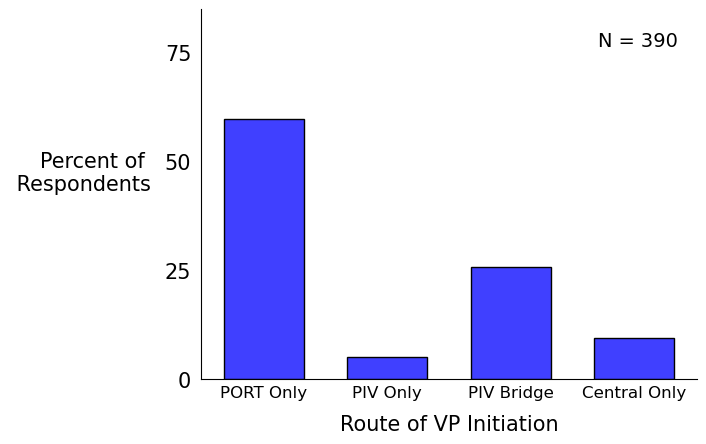

In [35]:
fig_3c = pd.Categorical(fig_3c,
                               categories=['PORT', 'PIV Only', 'PIV bridge', 'Central only'],
                               ordered=True
                       )
#fig_3a
ax = sns.histplot(
    data=fig_3c,
    stat = 'percent',
    shrink = 0.65,
    color = 'blue'
)
ax.set(xlabel='Route of VP Initiation', ylabel='Percent of \n Respondents', ylim = [0,85])
       #yscale = 'log')
    
ax.set_ylabel(ax.get_ylabel(), rotation = 0, ha = 'right', labelpad = 10)
ax.set_xlabel(ax.get_xlabel(), labelpad = 10)
ax.set_xticklabels(['PORT Only', 'PIV Only', 'PIV Bridge', 'Central Only'], fontsize = 12)
ax.tick_params(left = False, bottom = False)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='x', which='major', pad=1)
ax.annotate("N = 390", xy=(0.8,0.9),xycoords='axes fraction',
             fontsize=14)
ax.get_yaxis().set_tick_params(which='minor', size=0)
ax.yaxis.set_major_locator(plt.MultipleLocator(25))
ax.spines[['right', 'top']].set_visible(False)
#ax.margins(x = 0.18)

### Suppl. Table 3

In [36]:
pvp_data['case7_q21'] = pvp_data['case7_q21'].fillna('missing')
counts = pvp_data['case7_q21'].value_counts()
percs = pvp_data['case7_q21'].value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Central now,240,43.636364
PIV to central,146,26.545455
missing,63,11.454545
PIV continue,61,11.090909
Alternative access,40,7.272727


In [37]:
pvp_data['case8_q24'] = pvp_data['case8_q24'].fillna('missing')
counts = pvp_data['case8_q24'].value_counts()
percs = pvp_data['case8_q24'].value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Central now,225,40.909091
PIV to central,169,30.727273
missing,67,12.181818
PIV continue,50,9.090909
Alternative access,39,7.090909


In [38]:
pvp_data['case9_q27'] = pvp_data['case9_q27'].fillna('missing')
counts = pvp_data['case9_q27'].value_counts()
percs = pvp_data['case9_q27'].value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Central now,223,40.545455
PIV to central,156,28.363636
missing,67,12.181818
PIV continue,65,11.818182
Alternative access,39,7.090909


In [39]:
pvp_data['case10_q30'] = pvp_data['case10_q30'].fillna('missing')
counts = pvp_data['case10_q30'].value_counts()
percs = pvp_data['case10_q30'].value_counts(normalize=True)*100
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Central now,246,44.727273
PIV to central,151,27.454545
missing,67,12.181818
PIV continue,51,9.272727
Alternative access,35,6.363636


### Figure 4

In [40]:
pvp_clean = pd.read_csv('C:/Users/julienw/OneDrive - Michigan Medicine/Documents/PVP/Data/pvp_clean_fixed.csv')
pvp_clean =  pvp_clean[pvp_clean['case1_q3'].notna() | pvp_clean['case2_q6'].notna() 
                   | pvp_clean['case3_q8'].notna() | pvp_clean['case4_q11'].notna() |
                   pvp_clean['case5_q14'].notna() | pvp_clean['case6_q17'].notna()].reset_index(drop = True)

In [41]:
# Create new fluid variables derived from recommended treatment variable
# np.where(condition, value if condition is true, value if condition is false)
pvp_clean['fluid 1'] = np.where(pvp_clean['case1_q3'].isna(), np.nan,
                                np.where((pvp_clean['case1_q3'] == 1) | (pvp_clean['case1_q3'] == 2), 1, 0))
pvp_clean['fluid 2'] = np.where(pvp_clean['case2_q6'].isna(), np.nan,
                                np.where((pvp_clean['case2_q6'] == 1) | (pvp_clean['case2_q6'] == 2), 1, 0))
pvp_clean['fluid 3'] = np.where(pvp_clean['case3_q8'].isna(), np.nan,
                                np.where((pvp_clean['case3_q8'] == 1) | (pvp_clean['case3_q8'] == 2), 1, 0))
pvp_clean['fluid 4'] = np.where(pvp_clean['case4_q11'].isna(), np.nan,
                                np.where((pvp_clean['case4_q11'] == 1) | (pvp_clean['case4_q11'] == 2), 1, 0))
pvp_clean['fluid 5'] = np.where(pvp_clean['case5_q14'].isna(), np.nan,
                                np.where((pvp_clean['case5_q14'] == 1) | (pvp_clean['case5_q14'] == 2), 1, 0))
pvp_clean['fluid 6'] = np.where(pvp_clean['case6_q17'].isna(), np.nan,
                                np.where((pvp_clean['case6_q17'] == 1) | (pvp_clean['case6_q17'] == 2), 1, 0))

In [42]:
fluids = pvp_clean[['fluid 1', 'fluid 2', 'fluid 3', 'fluid 4', 'fluid 5', 'fluid 6']]

Text(0.5, 1.0, 'Number of cases where respondents gave fluid')

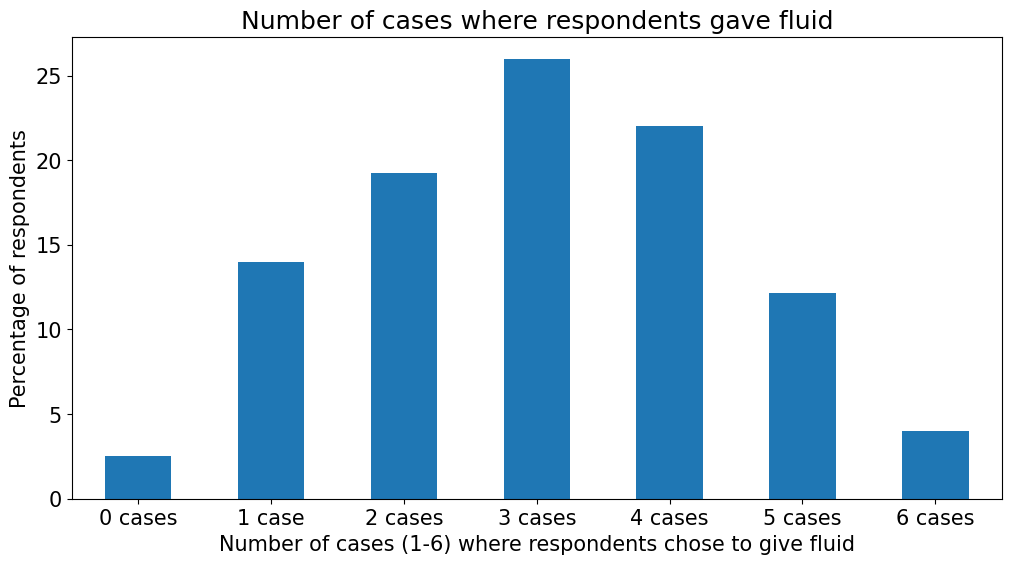

In [43]:
ax = fluids.sum(axis=1).value_counts(normalize=True).mul(100).sort_index().plot.bar(rot=0, figsize=(12,6))
# and do some cosmetics
#ax.set_xticklabels([f'{i.get_text()} case(s)' for i in ax.get_xticklabels()])
ax.set_xticklabels(['0 cases', '1 case', '2 cases', 
                    '3 cases', '4 cases', '5 cases', '6 cases'], fontsize = 15)
#ax.set(ylim = [0,30])
ax.set_ylabel('Percentage of respondents')
ax.set_xlabel('Number of cases (1-6) where respondents chose to give fluid')
ax.set_title('Number of cases where respondents gave fluid')
#ax.tick_params(axis='x', which='major', pad=10)

In [44]:
# Create pressors variables derived from recommended treatment variable
pvp_clean['pressor 1'] = np.where(pvp_clean['case1_q3'].isna(), np.nan,
                                  np.where((pvp_clean['case1_q3'] == 2) | (pvp_clean['case1_q3'] == 3), 1, 0))
pvp_clean['pressor 2'] = np.where(pvp_clean['case2_q6'].isna(), np.nan,
                                  np.where((pvp_clean['case2_q6'] == 2) | (pvp_clean['case2_q6'] == 3), 1, 0))
pvp_clean['pressor 3'] = np.where(pvp_clean['case3_q8'].isna(), np.nan,
                                  np.where((pvp_clean['case3_q8'] == 2) | (pvp_clean['case3_q8'] == 3), 1, 0))
pvp_clean['pressor 4'] = np.where(pvp_clean['case4_q11'].isna(), np.nan,
                                  np.where((pvp_clean['case4_q11'] == 2) | (pvp_clean['case4_q11'] == 3), 1, 0))
pvp_clean['pressor 5'] = np.where(pvp_clean['case5_q14'].isna(), np.nan,
                                  np.where((pvp_clean['case5_q14'] == 2) | (pvp_clean['case5_q14'] == 3), 1, 0))
pvp_clean['pressor 6'] = np.where(pvp_clean['case6_q17'].isna(), np.nan,
                                  np.where((pvp_clean['case6_q17'] == 2) | (pvp_clean['case6_q17'] == 3), 1, 0))

In [45]:
pressors = pvp_clean[['pressor 1', 'pressor 2', 'pressor 3', 'pressor 4', 'pressor 5', 'pressor 6']]

Text(0.5, 1.0, 'Number of cases where respondents gave vasopressors')

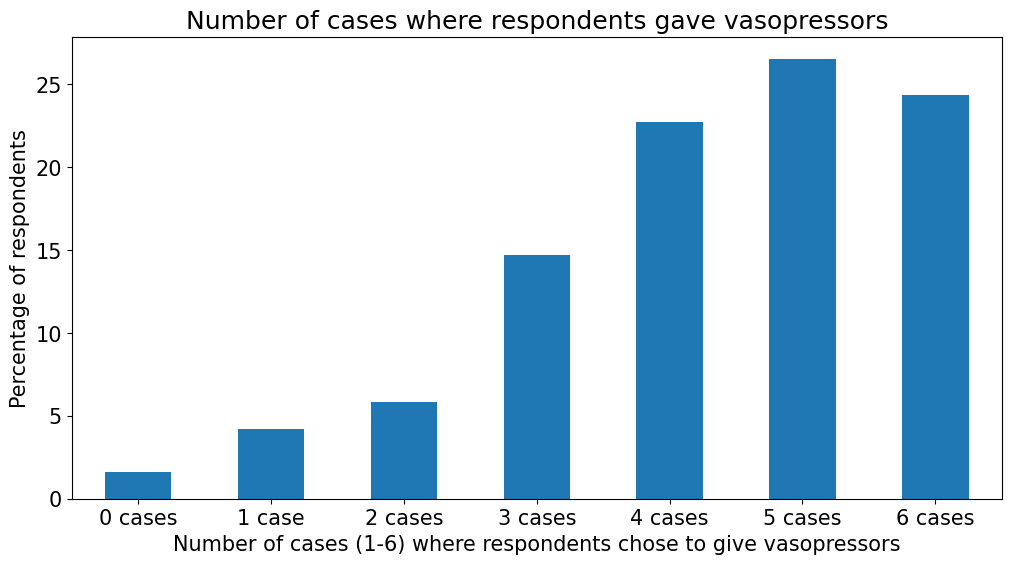

In [46]:
ax = pressors.sum(axis=1).value_counts(normalize=True).mul(100).sort_index().plot.bar(rot=0, figsize=(12,6))
# and do some cosmetics
#ax.set_xticklabels([f'{i.get_text()} case(s)' for i in ax.get_xticklabels()])
ax.set_xticklabels(['0 cases', '1 case', '2 cases', 
                    '3 cases', '4 cases', '5 cases', '6 cases'], fontsize = 15)
ax.set_ylabel('Percentage of respondents')
ax.set_xlabel('Number of cases (1-6) where respondents chose to give vasopressors')
ax.set_title('Number of cases where respondents gave vasopressors')
#ax.tick_params(axis='x', which='major', pad=10)

In [47]:
# Create cvc variable derived from continuation route
pvp_clean['cvc 7'] = np.where(pvp_clean['case7_q21'].isna(), np.nan,
                              np.where((pvp_clean['case7_q21'] == 3) | ((pvp_clean['case7_q21'] == 4)
                                 & (pvp_clean['altacc7_q21'] == 3)), 1, 0))
pvp_clean['cvc 8'] = np.where(pvp_clean['case8_q24'].isna(), np.nan,
                              np.where((pvp_clean['case8_q24'] == 3) | ((pvp_clean['case8_q24'] == 4)
                                 & (pvp_clean['altacc8_q24'] == 3)), 1, 0))
pvp_clean['cvc 9'] = np.where(pvp_clean['case9_q27'].isna(), np.nan,
                              np.where((pvp_clean['case9_q27'] == 3) | ((pvp_clean['case9_q27'] == 4)
                                 & (pvp_clean['altacc9_q27'] == 3)), 1, 0))
pvp_clean['cvc 10'] = np.where(pvp_clean['case10_q30'].isna(), np.nan,
                              np.where((pvp_clean['case10_q30'] == 3) | ((pvp_clean['case10_q30'] == 4)
                                 & (pvp_clean['altacc10_q30'] == 3)), 1, 0))

In [48]:
cvc = pvp_clean[['cvc 7', 'cvc 8', 'cvc 9', 'cvc 10']]

Text(0.5, 1.0, 'Number of cases where respondents placed a central line')

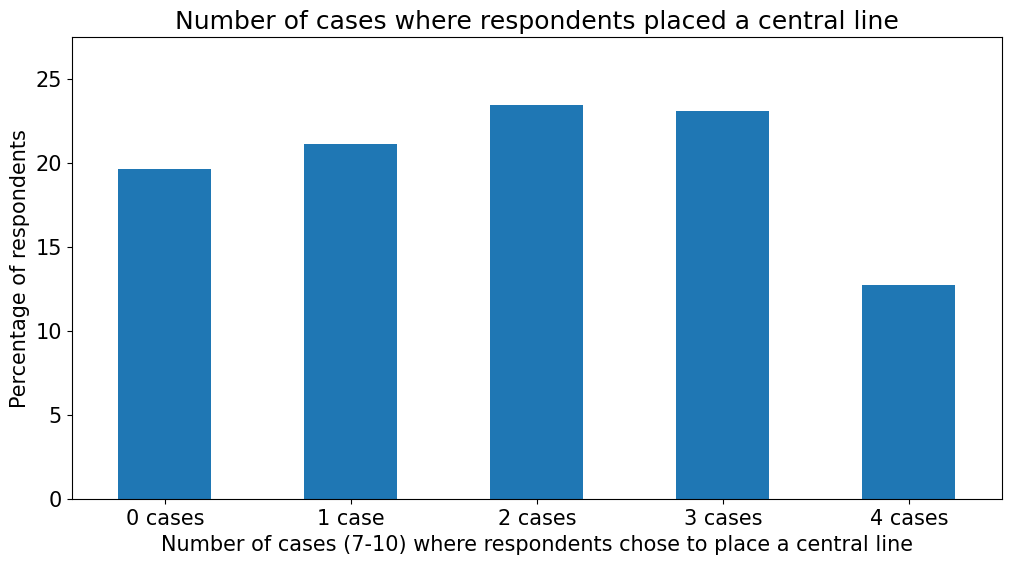

In [49]:
ax = cvc.sum(axis=1).value_counts(normalize=True).mul(100).sort_index().plot.bar(rot=0, figsize=(12,6))
# and do some cosmetics
#ax.set_xticklabels([f'{i.get_text()} case(s)' for i in ax.get_xticklabels()])
ax.set(ylim = [0,27.5])
ax.set_xticklabels(['0 cases', '1 case', '2 cases', 
                    '3 cases', '4 cases'], fontsize = 15)
ax.set_ylabel('Percentage of respondents')
ax.set_xlabel('Number of cases (7-10) where respondents chose to place a central line')
ax.set_title('Number of cases where respondents placed a central line')
#ax.tick_params(axis='x', which='major', pad=10)

### Suppl. Table 1

In [50]:
# Define the possible values for each column
gender_values = [1, 2, 3]
role_values = [1, 2, 3]
region_values = [1, 2, 3, 4, 5, 6]
survey_values = [1, 0]

# Define the number of occurrences for each value in each column
gender_counts_survey = [261, 192, 97]
role_counts_survey = [337, 101, 32]
region_counts_survey = [141, 121, 118, 88, 2, 80]
survey_counts_survey = [550, 0]

gender_counts_sccm = [3354, 2167, 5681]
role_counts_sccm = [8804, 2392, 6]
region_counts_sccm = [2823, 2601, 3397, 1867, 54, 460]
survey_counts_sccm = [0, 11202]

# Generate the arrays of repeated values for each column
gender_survey = np.repeat(gender_values, gender_counts_survey)
role_survey = np.repeat(role_values, role_counts_survey)
region_survey = np.repeat(region_values, region_counts_survey)
survey_survey = np.repeat(survey_values, survey_counts_survey)

gender_sccm = np.repeat(gender_values, gender_counts_sccm)
role_sccm = np.repeat(role_values, role_counts_sccm)
region_sccm = np.repeat(region_values, region_counts_sccm)
survey_sccm = np.repeat(survey_values, survey_counts_sccm)

# Combine the arrays into Pandas dataframes
df_survey = pd.concat([pd.Series(gender_survey), pd.Series(role_survey), 
                       pd.Series(region_survey), pd.Series(survey_survey)], axis=1)
df_survey.columns = ['Gender', 'Role', 'Region', 'Survey']

df_sccm = pd.concat([pd.Series(gender_sccm), pd.Series(role_sccm), 
                     pd.Series(region_sccm), pd.Series(survey_sccm)], axis=1)
df_sccm.columns = ['Gender', 'Role', 'Region', 'Survey']

# Concatenate survey and SCCM data
frames = [df_survey, df_sccm]
supp_table_1 = pd.concat(frames)
# Convert data set to csv and export to working directory
supp_table_1.to_csv('C:/Users/julienw/OneDrive - Michigan Medicine/Documents/PVP/Data/supp_table_1.csv',index = False)

### Table 4

In [51]:
comments = pvp_data[['case1_comment', 'case2_comment', 'case3_comment', 'case4_comment', 'case5_comment',
                     'case6_comment', 'case7_comment', 'case8_comment', 'case9_comment', 'case10_comment', 
                     'realism_comment', 'infl_factors_other', 'usual_comment']]

In [52]:
comments = comments.dropna(how = 'all')

In [53]:
comments.to_csv('C:/Users/julienw/OneDrive - Michigan Medicine/Documents/PVP/Data/comments.csv',index = False)